In [2]:
# Built-in Modules
import os
import re
import zipfile
import warnings

# Data Science and Machine Learning Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Processing Libraries
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC

import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer


# Configuration
# ============================
# Ignore warnings
warnings.filterwarnings("ignore")

# Set maximum column width for pandas DataFrame display
pd.set_option('display.max_colwidth', None)

# Set seaborn theme for visualizations
sns.set_theme()

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

# NLTK Data Downloads
nltk.download('punkt')
nltk.download('stopwords')

# Install Required Libraries
!pip install scikit-learn

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import random
fake=pd.read_csv('Fake.csv')
fake['label']='fake'
true=pd.read_csv('True.csv')
true['label']='true'
data=pd.concat([fake[['label','text']],true[['label','text']]],axis=0).reset_index(drop=True)
n=len(data)
N=list(range(n))
random.shuffle(N)
data=data.iloc[N]
display(data)

label  \
5228   fake   
33379  true   
26039  true   
6186   fake   
17228  fake   
...     ...   
12589  fake   
32818  true   
6905   fake   
19964  fake   
18741  fake   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [4]:
data['text']=data['text'].str.lower()

stopwords_list = stopwords.words('english')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["text"] = data["text"].apply(lambda text: cleaning_stopwords(text))



In [5]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

data["text"] = data["text"].apply(lambda x: cleaning_punctuations(x))

In [22]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

data["text"] = data["text"].apply(lambda x: cleaning_repeating_char(x))

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


TypeError: expected string or bytes-like object, got 'list'

In [7]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

data["text"] = data["text"].apply(lambda x: cleaning_URLs(x))

In [8]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

data["text"] = data["text"].apply(lambda x: cleaning_numbers(x))

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data["text"] = data["text"].apply(tokenizer.tokenize)

In [11]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data["text"] = data["text"].apply(lambda x: stemming_on_text(x))

In [12]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data["text"] = data["text"].apply(lambda x: lemmatizer_on_text(x))

There are 10511396 words in total, with vocabulary size of 207294


<BarContainer object of 25 artists>

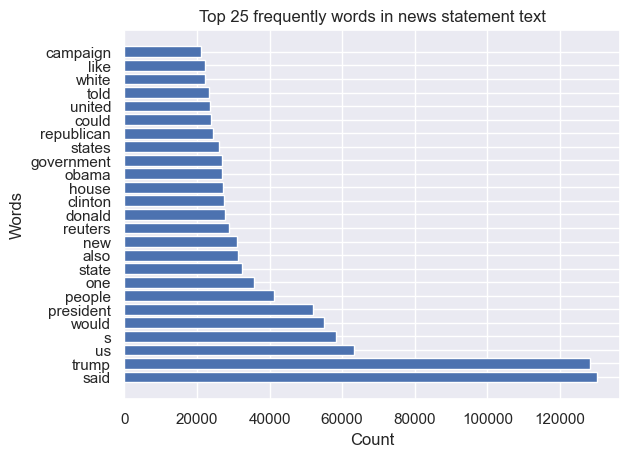

In [13]:
import collections
from collections import Counter

words = [word for tokens in data["text"] for word in tokens]
lenght_of_each_sentence = [len(tokens) for tokens in data["text"]]
vocabulary  = sorted(list(set(words)))
print("There are %s words in total, with vocabulary size of %s" % (len(words), len(vocabulary)))

counts_of_words = Counter(words)


words = []
counts = []
for letter, count in counts_of_words.most_common(25):
    words.append(letter)
    counts.append(count)
plt.title('Top 25 frequently words in news statement text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts)

In [14]:
data['label'] = data['label'].map({'fake': 0, 'true': 1})

In [15]:
data.head()

,label,text
5228,0,"[fared, zakaria, tends, go, heart, mater, talking, prety, much, anything, likely, anybody, expected, criticize, donald, trump, bluntly, did, zakaria, live, cn, speaking, wolf, blitzer, says, presidential, candidate, come, back, time, again, clarify, says, volatile, isues, like, rusiazakaria, explained, patern, ignorance, trump, how, someone, points, wrong, somewhere, comes, back, certain, bravado, tries, explain, away, twet, statement, listed, multiple, examples, this, brexit, nuclear, triad, even, tim, kaine, governor, trump, said, new, jersey, kaine, actualy, governed, virginia, said, usualy, ads, pres, hates, him, term, kind, thing, mode, bulshit, artist, damn, truth, bomb, ever, one, trump, is, inded, bulshit, artist, way, put, it, watch, ...]"
33379,1,"[washington, reuters, chinese, finance, minister, lou, jiwei, criticized, republican, presidential, frontruner, donald, trump, caling, an, irational, type, due, proposal, tarifs, imported, chinese, gods, increased, percent, interview, wal, stret, journal, published, sunday, lou, said, trump, irational, type, this, would, violation, rules, set, world, trade, organization, lou, said, united, states, put, trump, s, proposal, efect, would, entitled, position, world, s, major, power, us, neds, recognize, us, china, mutualy, dependent, other, economic, cycles, intertwined, acknowledged, rhetoric, us, presidential, campaign, become, heated, china, united, states, largest, trading, partner, chinese, oficials, generaly, avoided, criticizing, trump, directly, though, made, indirect, criticism, proposal, ban, muslims, entering, united, ...]"
26039,1,"[reuters, us, senate, republicans, expected, vote, tuesday, opening, debate, healthcare, bil, without, knowing, it, potential, components, legislation, clear, aproaches, hamered, republicans, recent, months, expected, mix, senate, majority, leader, mitch, mconel, making, key, choices, out, based, much, suport, given, combination, atract, one, bil, could, introduce, would, repeal, much, obamacare, replacement, plan, another, bil, could, repeal, replace, law, also, overhauling, medicaid, federal, health, insurance, program, por, disabled, bils, faced, criticism, health, industry, afordable, care, act, dubed, obamacare, extended, insurance, milion, americans, democratic, former, president, barack, obama, s, signature, domestic, achievement, seven, years, republicans, promised, repeal, replace, it, strugled, so, even, though, control, ...]"
6186,0,"[republicans, priorities, whack, texas, gop, curently, waging, war, women, specificaly, ability, safe, sanitary, abortion, instead, taking, wire, hanger, bathrom, top, gop, legislators, state, waged, extended, war, planed, parenthod, based, fraudulent, heavilyedited, videos, depicting, health, organization, evil, cabal, murders, babies, sels, body, parts, highest, bidertop, gop, legislators, state, waged, extended, war, planed, parenthod, based, fraudulent, heavilyedited, videos, depicting, health, organization, evil, cabal, murders, babies, sels, body, parts, highest, bider, though, creators, baby, parts, videos, ultimately, indicted, grand, jury, face, decades, prison, war, planed, parenthod, rages, lone, star, statetexas, latest, asault, women, rights, comes, form, atempt, legislate, bathroms, transgender, women, even, would, ...]"
17228,0,"[knowing, many, members, isis, terorist, groups, sliped, undetected, country, yet, another, serious, consequence, obama, open, borders, several, thousand, new, york, city, uniformed, plain, clothes, oficers, patrol, city, wekend, closed, circuit, security, cameras, closely, watchedair, water, patrol, equiped, radiation, detectionpolice, oficers, also, equiped, special, radiation, detection, monitors, put, belts, detect, dirty, bombs, america, faces, highest, threat, level, ever, year, th, julyhtpsyoutubezflowizcluvia, gateway, pundit]"


In [16]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(3, 3),
    max_features =2000)

# Fit the TfidfVectorizer and transform the text data
Get_Vec = word_vectorizer.fit_transform(data['text'].astype(str))
Get_Vec = Get_Vec.toarray()

# Use get_feature_names_out() instead of get_feature_names()
vocab1 = word_vectorizer.get_feature_names_out()
Features_vect = pd.DataFrame(np.round(Get_Vec, 1), columns=vocab1)
Features_vect.head()


,abc s this,abdel fatah alsisi,aboard air force,acording court documents,acording media reports,acording new york,acording people familiar,acording reutersipsos pol,acording washington post,acording white house,...,york daily news,york new jersey,york real estate,york reuters us,york times report,york times reported,york times washington,you re going,zeid ra ad,zone listen show
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df=data.drop(columns=['text'])

df = pd.concat([df, Features_vect], axis=1)

df.head()

,label,abc s this,abdel fatah alsisi,aboard air force,acording court documents,acording media reports,acording new york,acording people familiar,acording reutersipsos pol,acording washington post,...,york daily news,york new jersey,york real estate,york reuters us,york times report,york times reported,york times washington,you re going,zeid ra ad,zone listen show
5228,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33379,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26039,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6186,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17228,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import pickle 

# Save vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(word_vectorizer, vec_file)

## LSTM MODEL

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Assuming your data is in a Pandas DataFrame called df
# Separate features (X) and target labels (y)
X = df.drop(columns=['label'])  # All columns except 'label'
y = df['label']  # Target variable

# Convert y to categorical if it's a classification problem
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit LSTM input: [samples, time_steps, features]
# We treat each column as a time step, so we reshape it into (n_samples, n_features, 1)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()

# LSTM layer with 128 units, input shape is (X_train.shape[1], 1)
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add another LSTM layer with 64 units
model.add(LSTM(64))
model.add(Dropout(0.2))  # Dropout for regularization

# Output layer for classification (using softmax for multi-class classification)
model.add(Dense(2, activation='sigmoid'))  # Assuming 2 classes (binary classification)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot the accuracy and loss graphs
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Call the plot function to visualize the training process
plot_history(history)'''


"import numpy as np\nimport matplotlib.pyplot as plt\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense, Dropout\nfrom keras.optimizers import Adam\nfrom sklearn.model_selection import train_test_split\nfrom keras.utils import to_categorical\n\n# Assuming your data is in a Pandas DataFrame called df\n# Separate features (X) and target labels (y)\nX = df.drop(columns=['label'])  # All columns except 'label'\ny = df['label']  # Target variable\n\n# Convert y to categorical if it's a classification problem\ny = to_categorical(y)\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Reshape the data to fit LSTM input: [samples, time_steps, features]\n# We treat each column as a time step, so we reshape it into (n_samples, n_features, 1)\nX_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))\nX_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1]

In [19]:
X = Features_vect
y = data['label']  # Use your label column from the original dataframe

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4715
           1       0.96      0.88      0.92      4265

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Confusion Matrix:
[[4562  153]
 [ 499 3766]]


<Axes: >

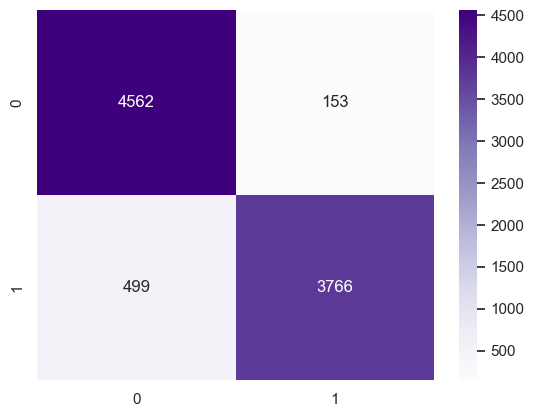

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

cm_lg = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lg, annot=True, cmap="Purples", fmt="d")

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4715
           1       0.97      0.88      0.92      4265

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



<Axes: >

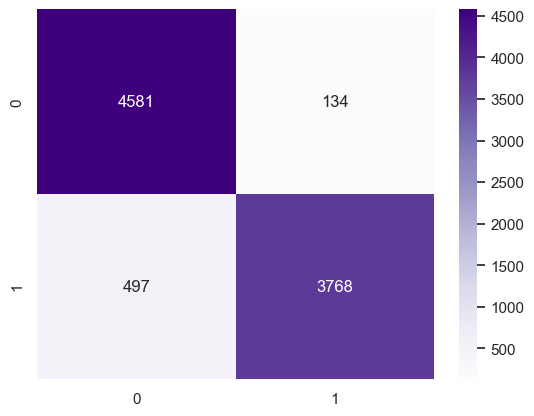

In [ ]:
cm_lg = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lg, annot=True, cmap="Purples", fmt="d")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20, 30],           # Depth of the trees
    'min_samples_split': [2, 5, 10],           # Min samples to split
    'min_samples_leaf': [1, 2, 4],             # Min samples at leaf
    'max_features': ['sqrt', 'log2', None]     # Max features for split
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Predict with the best model on test data
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define parameter grid for alpha
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10]}

# Set up Grid Search for Naive Bayes
grid_search_nb = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid_nb,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_nb.fit(X_train, y_train)

# Best Naive Bayes model after tuning
best_nb_model = grid_search_nb.best_estimator_
y_pred_best_nb = best_nb_model.predict(X_test)

# Evaluate the tuned model
print(f'Tuned Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_best_nb):.2f}')
print('\nClassification Report (Tuned Naive Bayes):')
print(classification_report(y_test, y_pred_best_nb))
print('\nConfusion Matrix (Tuned Naive Bayes):')
print(confusion_matrix(y_test, y_pred_best_nb))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tuned Naive Bayes Accuracy: 0.92

Classification Report (Tuned Naive Bayes):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4676
           1       0.93      0.91      0.92      4304

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980


Confusion Matrix (Tuned Naive Bayes):
[[4393  283]
 [ 406 3898]]


In [21]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(grid_search_nb, model_file)

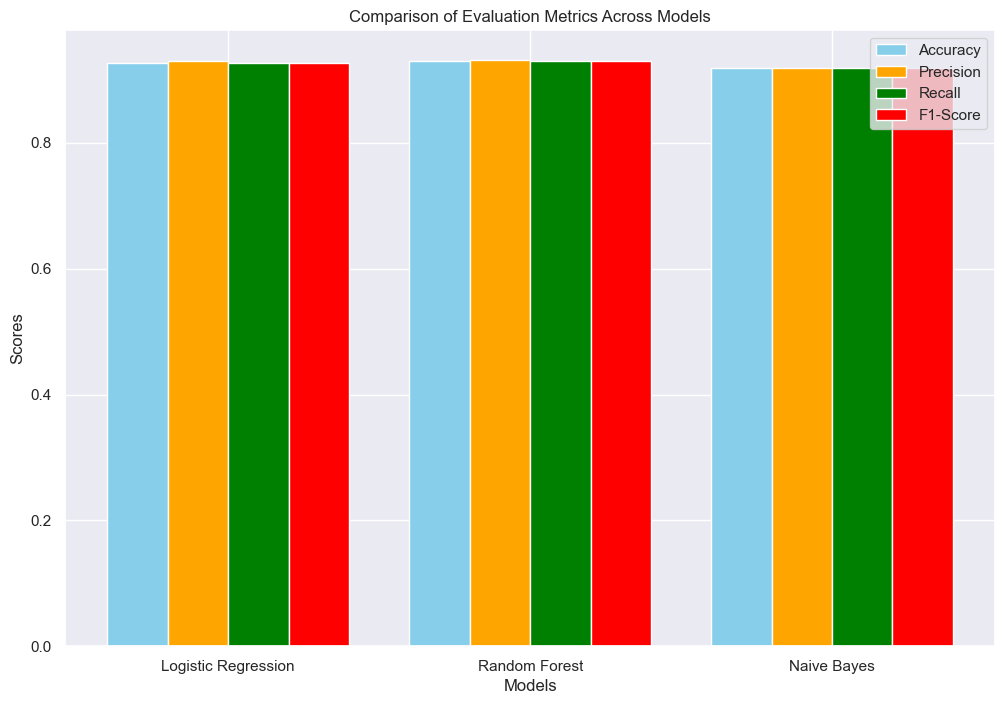

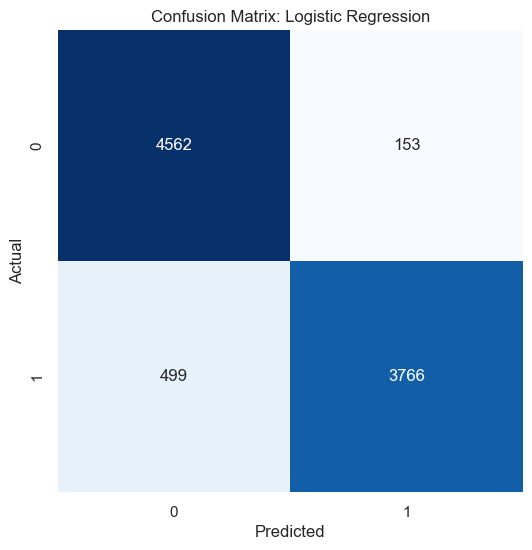

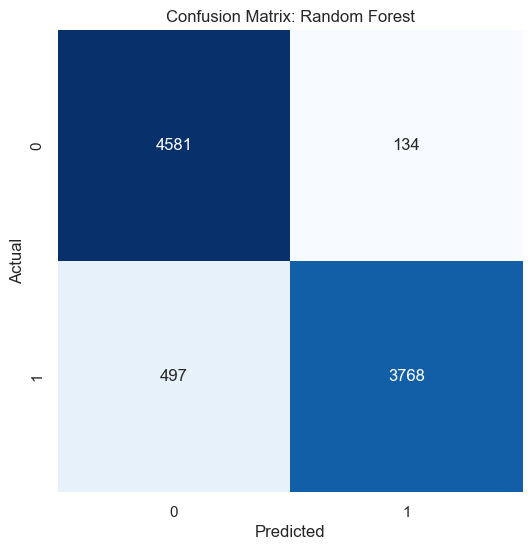

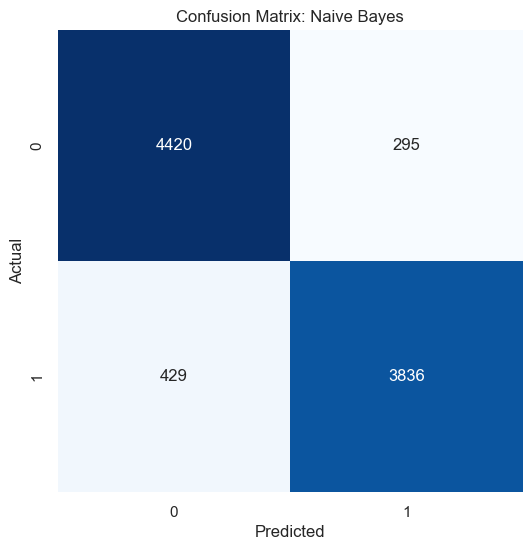

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4715
           1       0.96      0.88      0.92      4265

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4715
           1       0.97      0.88      0.92      4265

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4715
           1       0.93      0.90      0.91      4265

    accuracy                           0.92      898

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to store metrics for all models
model_names = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
log_reg_precision = precision_score(y_test, log_reg.predict(X_test), average='weighted')
log_reg_recall = recall_score(y_test, log_reg.predict(X_test), average='weighted')
log_reg_f1 = f1_score(y_test, log_reg.predict(X_test), average='weighted')

accuracies.append(log_reg_accuracy)
precisions.append(log_reg_precision)
recalls.append(log_reg_recall)
f1_scores.append(log_reg_f1)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, model.predict(X_test))
rf_precision = precision_score(y_test, model.predict(X_test), average='weighted')
rf_recall = recall_score(y_test, model.predict(X_test), average='weighted')
rf_f1 = f1_score(y_test, model.predict(X_test), average='weighted')

accuracies.append(rf_accuracy)
precisions.append(rf_precision)
recalls.append(rf_recall)
f1_scores.append(rf_f1)

# Calculate metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_best_nb)
nb_precision = precision_score(y_test, y_pred_best_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_best_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_best_nb, average='weighted')

accuracies.append(nb_accuracy)
precisions.append(nb_precision)
recalls.append(nb_recall)
f1_scores.append(nb_f1)

# Bar chart for Accuracy, Precision, Recall, and F1-Score
x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(12, 8))
plt.bar(x - width, accuracies, width, label='Accuracy', color='skyblue')
plt.bar(x, precisions, width, label='Precision', color='orange')
plt.bar(x + width, recalls, width, label='Recall', color='green')
plt.bar(x + 2 * width, f1_scores, width, label='F1-Score', color='red')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics Across Models')
plt.xticks(x + width / 2, model_names)
plt.legend()
plt.show()

# Confusion Matrices for each model
models_predictions = {
    'Logistic Regression': log_reg.predict(X_test),
    'Random Forest': model.predict(X_test),
    'Naive Bayes': y_pred_best_nb
}

for model_name, y_pred in models_predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Classification Reports
for model_name, y_pred in models_predictions.items():
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))


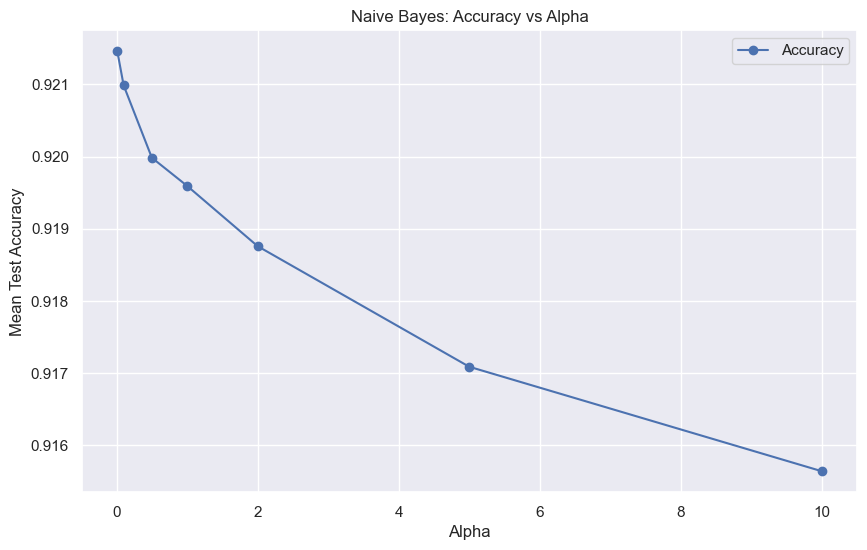

In [ ]:
# Example: Tracking metrics across GridSearchCV for Naive Bayes
cv_results = grid_search_nb.cv_results_
alphas = param_grid_nb['alpha']

# Accuracy trends
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_results['mean_test_score'], marker='o', label='Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Accuracy')
plt.title('Naive Bayes: Accuracy vs Alpha')
plt.legend()
plt.show()

# Extend this for other models (manually track metrics during training/tuning)


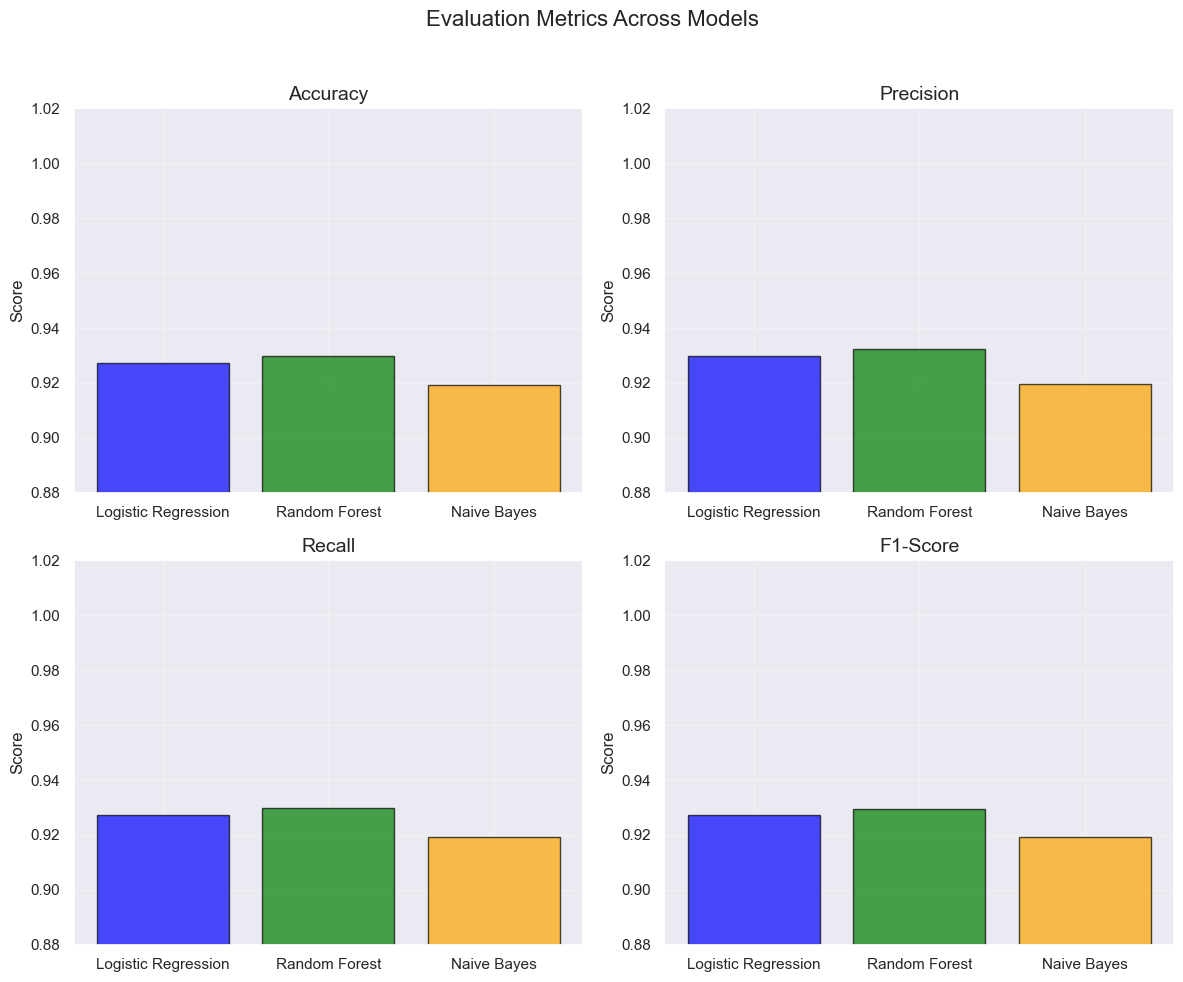

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
model_names = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Example values (replace with actual computed metrics)
metric_values = [
    [log_reg_accuracy, rf_accuracy, nb_accuracy],   # Accuracy
    [log_reg_precision, rf_precision, nb_precision],  # Precision
    [log_reg_recall, rf_recall, nb_recall],        # Recall
    [log_reg_f1, rf_f1, nb_f1]                     # F1-Score
]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for 4 metrics
axes = axes.ravel()  # Flatten for easier iteration

# Plot each metric in a separate subplot
for idx, ax in enumerate(axes):
    ax.bar(model_names, metric_values[idx], color=['blue', 'green', 'orange'], alpha=0.7, edgecolor='black')
    ax.set_ylim(0.88, 1.02)  # Adjust y-axis for better distinction
    ax.set_title(metrics[idx], fontsize=14)
    ax.set_ylabel('Score', fontsize=12)
    ax.grid(alpha=0.3)

# Adjust layout and show
plt.suptitle('Evaluation Metrics Across Models', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


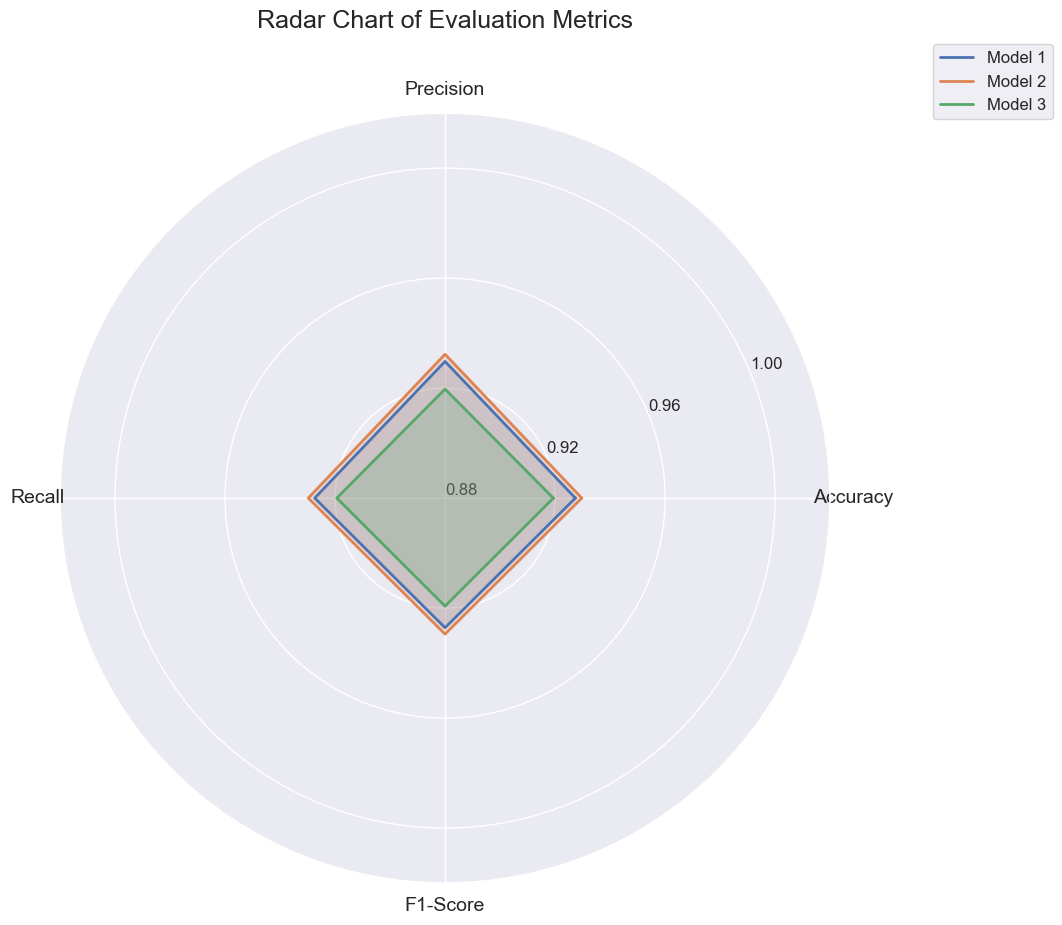

In [ ]:
from math import pi
import matplotlib.pyplot as plt

# Data for radar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_metrics = len(metrics)

# Values for each model
log_reg_values = [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]
rf_values = [rf_accuracy,rf_precision,rf_recall,rf_f1]
nb_values = [nb_accuracy,nb_precision,nb_recall,nb_f1]

# Combine into one dataset and close the loop
data = [log_reg_values, rf_values, nb_values]
data = [values + [values[0]] for values in data]
metrics += [metrics[0]]  # Close the loop for metrics

# Angles for radar chart
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += [angles[0]]  # Close the loop for angles

# Enlarge plot size
plt.figure(figsize=(10, 10))  # Increased size
ax = plt.subplot(111, polar=True)

for i, model_values in enumerate(data):
    ax.plot(angles, model_values, label=f'Model {i + 1}', linewidth=2)
    ax.fill(angles, model_values, alpha=0.2)

# Add labels and legend
ax.set_xticks(angles[:-1])  # Use only the original angles for labels
ax.set_xticklabels(metrics[:-1], fontsize=14)  # Larger font for better readability
ax.set_ylim(0.88, 1.02)
ax.set_yticks([0.88, 0.92, 0.96, 1.00])
ax.set_yticklabels(['0.88', '0.92', '0.96', '1.00'], fontsize=12)
ax.set_title('Radar Chart of Evaluation Metrics', fontsize=18, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
plt.show()


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

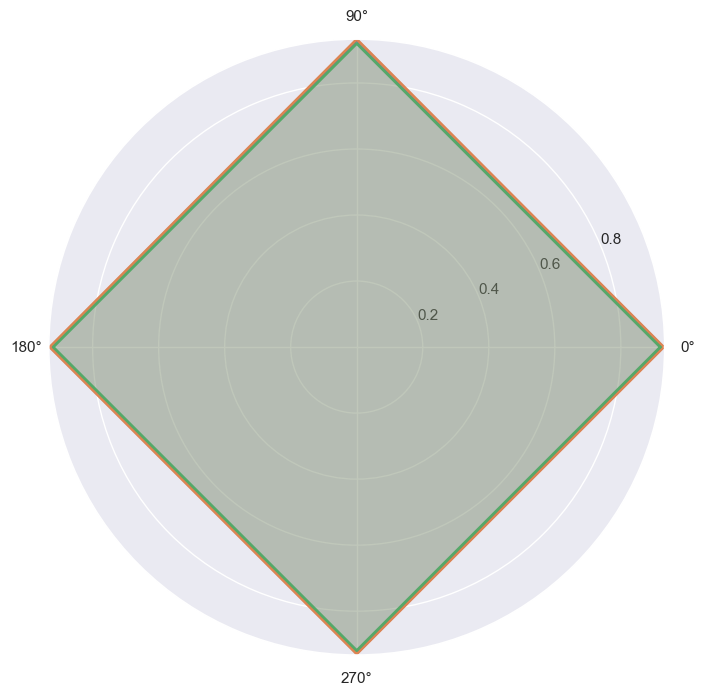

In [ ]:
from math import pi

# Data for radar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
num_metrics = len(metrics)

metric_values = [
    [log_reg_accuracy, rf_accuracy, nb_accuracy],   # Accuracy
    [log_reg_precision, rf_precision, nb_precision],  # Precision
    [log_reg_recall, rf_recall, nb_recall],        # Recall
    [log_reg_f1, rf_f1, nb_f1]                     # F1-Score
]
# Values for each model
log_reg_values = [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]
rf_values = [rf_accuracy,rf_precision,rf_recall,rf_f1]
nb_values = [nb_accuracy,nb_precision,nb_recall,nb_f1]

# Combine into one dataset and close the loop
data = [log_reg_values, rf_values, nb_values]
data = [values + [values[0]] for values in data]
metrics += [metrics[0]]  # Close the loop for metrics

# Angles for radar chart
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += [angles[0]]

# Plot each model
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, model_values in enumerate(data):
    ax.plot(angles, model_values, label=model_names[i], linewidth=2)
    ax.fill(angles, model_values, alpha=0.2)

# Add labels and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0.88, 1.02)
ax.set_yticks([0.88, 0.92, 0.96, 1.00])
ax.set_yticklabels(['0.88', '0.92', '0.96', '1.00'], fontsize=10)
ax.set_title('Radar Chart of Evaluation Metrics', fontsize=16, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.show()


## CNN LSTM HYBRID

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming 'df' is your dataframe with 2000 features per sample
X = df.iloc[:, 1:].values  # Features (2000-dimensional word vectors)
y = df['label'].values     # Labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for Conv1D (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 2000, 1)  # reshape to (samples, timesteps, features)
X_test = X_test.reshape(X_test.shape[0], 2000, 1)

# Model Definition
model = Sequential()

# CNN Layer: Extract local spatial features from the word embeddings
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(2000, 1)))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer: Capture sequential dependencies after the CNN features
model.add(LSTM(64))

# Fully Connected Layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print accuracy and classification report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Epoch 1/10
 57/898 ━━━━━━━━━━━━━━━━━━━━ 6:09 440ms/step - accuracy: 0.5112 - loss: 0.6934

KeyboardInterrupt: 

## DeBERTa V3 Model

In [ ]:
# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(data['text'], data['label'], test_size=0.2)

In [ ]:
# Load the tokenizer (DeBERTa v2 tokenizer, not fast version)
tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

# Set max_length (e.g., 512 tokens) for truncation
max_length = 512

# Convert the Pandas Series to a list
train_texts = train_texts.tolist()
val_texts = val_texts.tolist()

# Now you can tokenize the text data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')



ValueError: too many values to unpack (expected 2)

In [ ]:
class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets for training and validation
train_dataset = FakeNewsDataset(train_encodings, train_labels)
val_dataset = FakeNewsDataset(val_encodings, val_labels)


In [ ]:
# Load the pre-trained DeBERTa v3 model
model = DebertaV2ForSequenceClassification.from_pretrained('microsoft/deberta-v3-base', num_labels=2)


In [ ]:
# Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',            # Output directory for model checkpoints
    num_train_epochs=3,                # Number of epochs
    per_device_train_batch_size=8,     # Batch size for training
    per_device_eval_batch_size=8,      # Batch size for evaluation
    warmup_steps=500,                  # Warmup steps
    weight_decay=0.01,                 # Weight decay for optimization
    evaluation_strategy="epoch",       # Evaluate after each epoch
    logging_dir='./logs',              # Logging directory
)


In [ ]:
# Initialize the Trainer
trainer = Trainer(
    model=model,                      # The pre-trained model
    args=training_args,               # Training arguments
    train_dataset=train_dataset,      # Training dataset
    eval_dataset=val_dataset          # Validation dataset
)


In [ ]:
# Train the model
trainer.train()
